<a href="https://colab.research.google.com/github/HaAdam1/K05_2Dto3D/blob/base/Autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
from keras.datasets import mnist
import numpy as np
#tanítási adatok az mnist könyvtárból
(x_train, _), (x_test, _) = mnist.load_data()
print(x_train.shape)
#átméretezés
x_train = x_train.astype('float32') / 255.
print(x_train.shape)
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
print(x_train.shape)
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))
#zaj használata
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape) 
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape) 
#tanítási és teszt minták szétválasztása
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

(60000, 28, 28)
(60000, 28, 28)
(60000, 28, 28, 1)


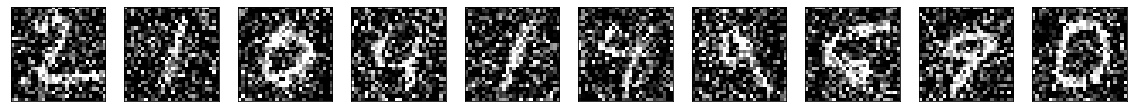

In [18]:
#zajos adatok kirajzolása
import matplotlib.pyplot as plt
n = 10
plt.figure(figsize=(20, 2))
for i in range(1, n + 1):
    ax = plt.subplot(1, n, i)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [22]:
import tensorflow as tf
from tensorflow import keras
from keras import layers
input_img = keras.Input(shape=(28, 28, 1))
#neurális háló be
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

# (7,7,32)-es reprezentációs méret
#neurális háló ki
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [23]:
#neurális háló tanítás 50 epochon keresztül
from keras.callbacks import TensorBoard
autoencoder.fit(x_train_noisy, x_train,
                epochs=50,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test_noisy, x_test),
                callbacks=[TensorBoard(log_dir='/tmp/tb', histogram_freq=0, write_graph=False)])

Epoch 1/50
469/469 [==============================] - 149s 315ms/step - loss: 0.2586 - val_loss: 0.1194
Epoch 2/50
469/469 [==============================] - 148s 316ms/step - loss: 0.1166 - val_loss: 0.1099
Epoch 3/50
469/469 [==============================] - 148s 315ms/step - loss: 0.1099 - val_loss: 0.1069
Epoch 4/50
469/469 [==============================] - 147s 313ms/step - loss: 0.1068 - val_loss: 0.1040
Epoch 5/50
469/469 [==============================] - 147s 313ms/step - loss: 0.1046 - val_loss: 0.1020
Epoch 6/50
469/469 [==============================] - 147s 314ms/step - loss: 0.1031 - val_loss: 0.1010
Epoch 7/50
469/469 [==============================] - 148s 315ms/step - loss: 0.1015 - val_loss: 0.0999
Epoch 8/50
469/469 [==============================] - 147s 313ms/step - loss: 0.1006 - val_loss: 0.0997
Epoch 9/50
469/469 [==============================] - 147s 313ms/step - loss: 0.0997 - val_loss: 0.0986
Epoch 10/50
469/469 [==============================] - 148s 315m

In [24]:
#adatok zajtalanítási a neurális hálóval
decode_imgs = autoencoder.predict(x_test_noisy)

(10000, 28, 28, 1)


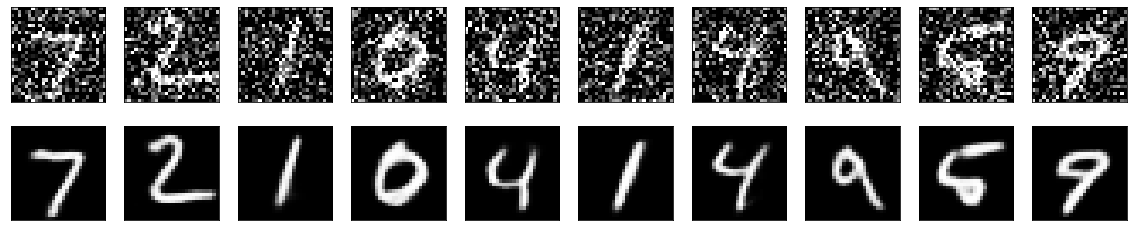

In [29]:
import matplotlib.pyplot as plt
print(decode_imgs.shape)

#rajzoljuk ki az adatokat
n = 10

plt.figure(figsize=(20, 4))
for i in range(n):
    # zajjal
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # zaj nélkül
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decode_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [156]:
import glob
import cv2
from skimage import color
import numpy as np
import matplotlib.pyplot as plt
import os

#wc3_test = np.array([color.rgb2gray(cv2.resize(cv2.imread(file),(64,64))) for file in glob.glob("/content/WC3test/*.png")])
wc3_test = np.array([cv2.resize(cv2.imread(file),(64,64)) for file in glob.glob("/content/WC3test/*.png")])
print(wc3_test.shape)
wc3_test = wc3_test.astype('float32') / 255.
wc3_test = np.reshape(wc3_test, (len(wc3_test), 64, 64, 3))

noise_factor = 0.5
wc3_test_noisy = wc3_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=wc3_test.shape)

#wc3_train = np.array([color.rgb2gray(cv2.resize(cv2.imread(file),(64,64))) for file in glob.glob("/content/WC3train/*.png")])
wc3_train = np.array([cv2.resize(cv2.imread(file),(64,64)) for file in glob.glob("/content/WC3train/*.png")])
print(wc3_train.shape)
wc3_train = wc3_train.astype('float32') / 255.
wc3_train = np.reshape(wc3_train, (len(wc3_train), 64, 64, 3))

wc3_train_noisy = wc3_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=wc3_train.shape)

(286, 64, 64, 3)
(753, 64, 64, 3)


In [160]:
import tensorflow as tf
from tensorflow import keras
from keras import layers
input_img = keras.Input(shape=(64, 64, 3))
#neurális háló be
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

# (7,7,32)-es reprezentációs méret
#neurális háló ki
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
model.summary()
#színes esetben jelentős minőségromlás, lehet hogy több paraméterrel jobb modellt tudnánk kialakítani,
#de természetesen egy zajcsökkentés után mindig upscalingnek kell következnie, az eredeti képminőséget nem tudjuk előállítani ezzel a módszerrel

In [165]:
#neurális háló tanítás 30 epochon keresztül az új adatszettel
#maradjunk ugyanannál a neurális háló elrendezésnél az egyszerűség és könnyű futtathatóság érdekében
from keras.callbacks import TensorBoard
autoencoder.fit(wc3_train_noisy, wc3_train,
                epochs=100,
                batch_size=128,
                shuffle=True,
                validation_data=(wc3_test_noisy, wc3_test),
                callbacks=[TensorBoard(log_dir='/tmp/tb', histogram_freq=0, write_graph=False)])

Epoch 1/100
6/6 [==============================] - 11s 2s/step - loss: 0.4855 - val_loss: 0.4970
Epoch 2/100
6/6 [==============================] - 11s 2s/step - loss: 0.4850 - val_loss: 0.4974
Epoch 3/100
6/6 [==============================] - 11s 2s/step - loss: 0.4845 - val_loss: 0.4962
Epoch 4/100
6/6 [==============================] - 11s 2s/step - loss: 0.4839 - val_loss: 0.4959
Epoch 5/100
6/6 [==============================] - 11s 2s/step - loss: 0.4835 - val_loss: 0.4954
Epoch 6/100
6/6 [==============================] - 11s 2s/step - loss: 0.4832 - val_loss: 0.4953
Epoch 7/100
6/6 [==============================] - 11s 2s/step - loss: 0.4831 - val_loss: 0.4950
Epoch 8/100
6/6 [==============================] - 11s 2s/step - loss: 0.4826 - val_loss: 0.4949
Epoch 9/100
6/6 [==============================] - 11s 2s/step - loss: 0.4824 - val_loss: 0.4946
Epoch 10/100
6/6 [==============================] - 11s 2s/step - loss: 0.4822 - val_loss: 0.4945
Epoch 11/100
6/6 [===========

In [166]:
#futtatás újra
wc3_icons_reforged = autoencoder.predict(wc3_test_noisy)

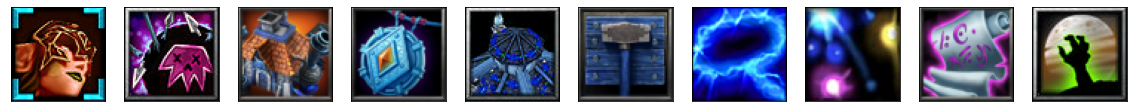

In [167]:
import matplotlib.pyplot as plt
n = 10
plt.figure(figsize=(20, 2))
for i in range(1, n + 1):
    ax = plt.subplot(1, n, i)
    plt.imshow(wc3_test[i].reshape(64, 64,3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

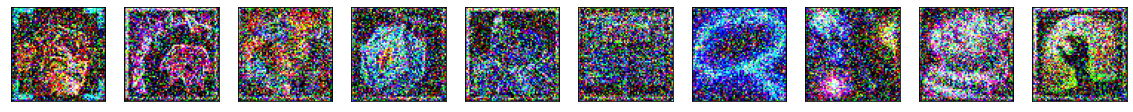

In [168]:
import matplotlib.pyplot as plt
n = 10
plt.figure(figsize=(20, 2))
for i in range(1, n + 1):
    ax = plt.subplot(1, n, i)
    plt.imshow(wc3_test_noisy[i].reshape(64, 64,3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

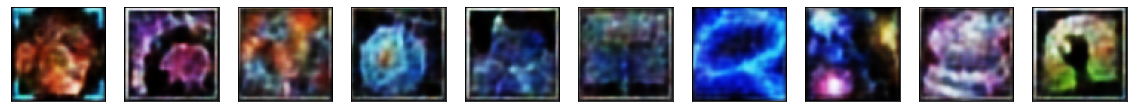

In [169]:
import matplotlib.pyplot as plt
n = 10
plt.figure(figsize=(20, 2))
for i in range(1, n + 1):
    ax = plt.subplot(1, n, i)
    plt.imshow(wc3_icons_reforged[i].reshape(64, 64,3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()